In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

In [2]:
marketing_df= pd.read_csv('marketing_campaign_data.csv')

In [3]:
marketing_df.sample(3)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1140,1140,849,1953,S2,Bertunangan,56129000.0,0,1,20-06-2013,65,...,4,0,0,0,0,0,0,3,11,0
1432,1432,9349,1985,S1,Menikah,92533000.0,0,0,19-12-2013,84,...,2,0,0,1,1,0,0,3,11,0
1334,1334,2535,1978,S2,Menikah,88097000.0,1,0,18-08-2012,24,...,9,0,1,1,1,0,0,3,11,1


In [4]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

Data description is as follows:

1. **Customer's Info**
- `ID`: Unique ID of each customer
- `Year_Birth`: Custumer's year of birth
- `Education`: Customer's level of education
- `Marital_Status`: Customer's marital status
- `Income`: customer's yearly household income
- `Kidhome`: number of small children in customer's household
- `Teenhome`: number of teenagers in customer's household

2. **Customer's activity**
- `Dt_Customer`: date of customer's enrollment with the company
- `Recency`: number of days since the last purchase
- `NumDealsPurchases`: number of purchases made with discount
- `NumWebPurchases`: number of purchases made through the company's website
- `NumCatalogPurchases`: number of purchases made using catalog (buying goods to be shipped through the mail)
- `NumStorePurchases`: number of purchases made directly in stores
- `NumWebVisitsMonth`: number of visits to company's website in the last month
- `Complain`: 1 if the customer complained in the last 2 years


3. **Products**
- `MntCoke`: the amount spent on coke products in the last 2 years
- `MntFruits`: the amount spent on fruits products in the last 2 years
- `MntMeatProducts`: the amount spent on meat products in the last 2 years
- `MntFishProducts`: the amount spent on fish products in the last 2 years
- `MntSweetProducts`: amount spent on sweet products in the last 2 years
- `MntGoldProds`: the amount spent on gold products in the last 2 years

4. **Campaign**
- `AcceptedCmp3`: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- `AcceptedCmp4`: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- `AcceptedCmp5`: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- `AcceptedCmp1`: if customer accepted the offer in the 1st campaign, 0 otherwise
- `AcceptedCmp2`: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- `Response` (target): 1 if customer accepted the offer in the last campaign, 0 otherwise
- `Z_CostContact`
- `Z_Revenue`



# Feature Extraction

### `age`

In [5]:
marketing_df['age'] = datetime.datetime.now().year - marketing_df['Year_Birth']

### `age_group`

In [6]:
# Grouping age into broader categories
age_group= []

for age in marketing_df['age']:
    if age <= 35:
        group = 'Young Adult'
    elif age <= 45:
        group = 'Adult'
    elif age <= 60:
        group = 'Middle Age'
    else:
        group = 'Elderly'
    age_group.append(group)
    
marketing_df['age_group'] = age_group

In [7]:
marketing_df.groupby('age_group')['ID'].count()

age_group
Adult          434
Elderly        699
Middle Age     987
Young Adult    120
Name: ID, dtype: int64

### `dependants`

In [8]:
# The number of customer's dependants
marketing_df['dependants']= marketing_df['Kidhome'] + marketing_df['Teenhome']

In [9]:
marketing_df['dependants'].unique()

array([0, 2, 1, 3], dtype=int64)

### `has_dependants`

In [10]:
# Whether or not customer has dependants
marketing_df['has_dependants'] = marketing_df.apply(lambda x: True if x['dependants'] > 0 else False, axis=1)

In [11]:
marketing_df.groupby('has_dependants')['ID'].count()

has_dependants
False     638
True     1602
Name: ID, dtype: int64

### `total_spending`

In [12]:
# The total amount of money that a customer spend on various products
marketing_df['total_spending'] = marketing_df[['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [13]:
marketing_df['total_spending'].describe()

count    2.240000e+03
mean     6.057982e+05
std      6.022493e+05
min      5.000000e+03
25%      6.875000e+04
50%      3.960000e+05
75%      1.045500e+06
max      2.525000e+06
Name: total_spending, dtype: float64

### `number_of_purchases` 

In [14]:
# The number of purchases made by customers through various sales channels
marketing_df['number_of_purchases'] = marketing_df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis= 1)

In [15]:
marketing_df['number_of_purchases'].describe()

count    2240.000000
mean       14.862054
std         7.677173
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: number_of_purchases, dtype: float64

### `total_successful_campaign`

In [16]:
# Number of times customers participated in the last 5 campaigns
marketing_df['total_successful_campaign'] = marketing_df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

In [17]:
marketing_df['total_successful_campaign'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

### `conversion_rate`

In [18]:
# Number of purchases divided by the number of web visits
def cvr(x, y):
    if y== 0:
        return 0
    return x/y

marketing_df['conversion_rate']= round(marketing_df.apply(lambda x: cvr(x['number_of_purchases'], x['NumWebVisitsMonth']), axis= 1), 2)

In [19]:
marketing_df['conversion_rate'].describe()

count    2240.000000
mean        4.395170
std         4.913677
min         0.000000
25%         1.220000
50%         2.600000
75%         5.347500
max        43.000000
Name: conversion_rate, dtype: float64

In [20]:
new_marketing_df= marketing_df.copy()

# EDA

Since outlier values can affect the visualization of the data making it more difficult to understand, in this process I will use a dataframe where outlier values in the columns that will be analyzed are handled first. Further handling of outliers will be carried out at the data cleansing stage.

In [21]:
# Creating function for outliers checking/deleting
def outlier_check(df, columns, mode='check'):
    for i in columns:      
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        lower_tail = q1 - (1.5 * iqr)
        upper_tail = q3 + (1.5 * iqr)
    
        total_outlier = ((df[i] <= lower_tail) | (df[i] >= upper_tail)).sum()
        total_row = df[i].count()
        outlier_percentage = round((total_outlier / total_row) * 100, 2)
    
        if mode == 'check':
            print(f'Total outliers in {i}: {total_outlier} with percentage: {outlier_percentage}%')
        elif mode == 'delete':
            df = df[(df[i] >= lower_tail) & (df[i] <= upper_tail)]
        else:
            print('Choose the appropriate mode (check or delete)')
    
    if mode == 'delete':
        return df

In [22]:
columns_to_delete= ['Income', 'age', 'total_spending', 'number_of_purchases']

outlier_check(new_marketing_df, columns_to_delete, mode='check')

Total outliers in Income: 8 with percentage: 0.36%
Total outliers in age: 3 with percentage: 0.13%
Total outliers in total_spending: 3 with percentage: 0.13%
Total outliers in number_of_purchases: 2 with percentage: 0.09%


In [23]:
eda_df= outlier_check(new_marketing_df, columns_to_delete, mode='delete')

## Puchasing Channel

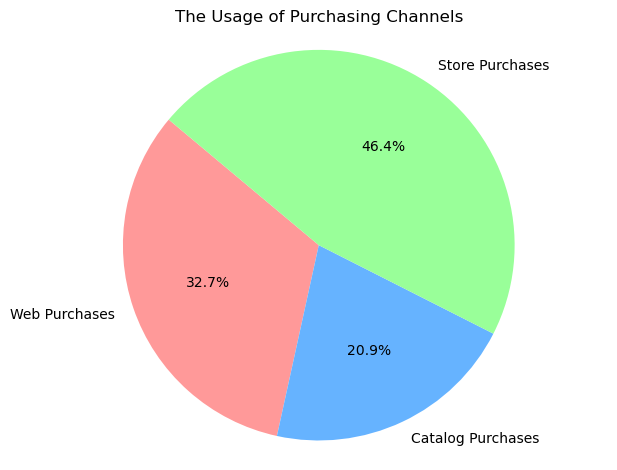

In [24]:
# Creating a pie chart to show customers's purchasing channels of preference
labels = ['Web Purchases', 'Catalog Purchases', 'Store Purchases']
sizes = [
    eda_df['NumWebPurchases'].sum(),
    eda_df['NumCatalogPurchases'].sum(),
    eda_df['NumStorePurchases'].sum()
]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.axis('equal')
plt.title('The Usage of Purchasing Channels')

plt.tight_layout()
plt.show()

Based on the above graph, it is evident that shopping through physical stores is the most popular choice, followed by online shopping via websites. Meanwhile, shopping through catalogs or email is the least favored option. 

This indicates that despite the increasing popularity of online shopping through websites, many people still prefer the hands-on experience of shopping in physical stores. Both of these options surpass shopping through catalogs or email, which may be less preferred due to the lack of convenience or a preference for a more interactive shopping experience.

## Products Contribution

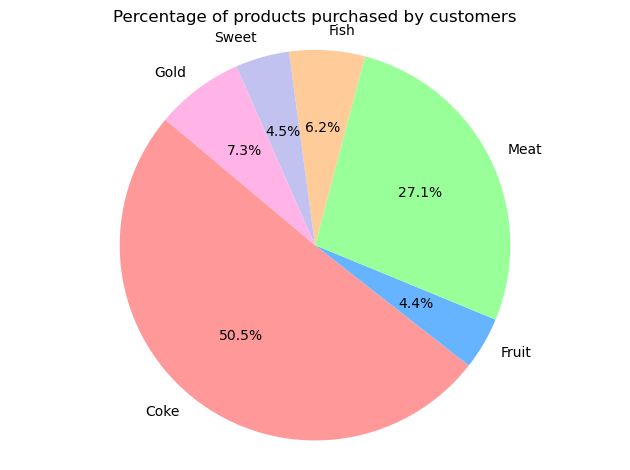

In [25]:
# Create a pie chart to show the products most frequently purchased by customers
labels = ['Coke', 'Fruit', 'Meat', 'Fish', 'Sweet', 'Gold']
sizes = [
    eda_df['MntCoke'].sum(),
    eda_df['MntFruits'].sum(),
    eda_df['MntMeatProducts'].sum(),
    eda_df['MntFishProducts'].sum(),
    eda_df['MntSweetProducts'].sum(),
    eda_df['MntGoldProds'].sum(),
]

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors= colors)
plt.axis('equal')
plt.title('Percentage of products purchased by customers')

plt.tight_layout()
plt.show()

From the data presented, it's evident that the product most frequently purchased by customers is cola, which contributes to more than 50% of the total customer spending. Following closely, meat products account for approximately 27% of the total spending. In contrast, other product categories make up less than 8% of the total spending, with fruit products being the least purchased by customers. 

This data highlights the significant popularity of cola among customers, with meat products also making up a substantial portion of their spending, while other product categories lag behind in terms of customer preferences, with fruit products being the least favored option.

## Income Based on Age Group and Customer Dependency Status

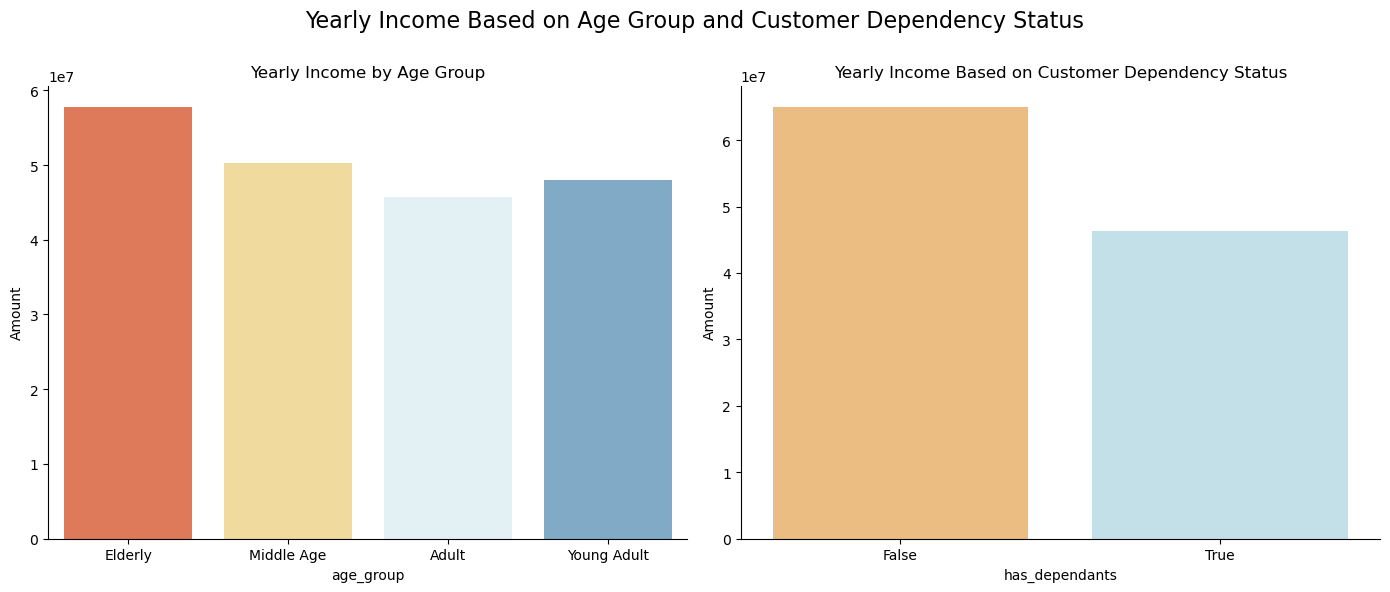

In [31]:
# Creating bar charts to see the distribution of customer's yearly income based on age group and dependency status
fig, axes= plt.subplots(1, 2, figsize= (14, 6))

# Subplot 1: age_group
sns.barplot(data= eda_df, x= 'age_group', y= 'Income', ax= axes[0], ci= None, palette='RdYlBu')
axes[0].set_title('Yearly Income by Age Group')
axes[0].set_ylabel('Amount')

# Subplot 2: has_dependants
sns.barplot(data= eda_df, x= 'has_dependants', y= 'Income', ax= axes[1], ci= None, palette='RdYlBu')
axes[1].set_title("Yearly Income Based on Customer Dependency Status")
axes[1].set_ylabel('Amount')

sns.despine()
fig.suptitle("Yearly Income Based on Age Group and Customer Dependency Status", fontsize=16)

plt.tight_layout()
plt.show()

Based on age groups, elderly individuals have the highest annual income, while adults have the lowest income among the groups. This indicates that, on average, the elderly population tends to have a more substantial annual income compared to younger adults. This observation may be attributed to various factors, including pension plans, investments, or other sources of retirement income that are more common among the elderly population.

Furthermore, the data also suggests a correlation between income and the presence of dependents. Customers without dependents appear to have higher incomes than those with dependents. This trend may be attributed to the composition of dependents in this dataset, mainly consisting of small children and teenagers. Given that the elderly age group, which has the highest income, is less likely to have dependents, it further strengthens the observation that individuals without dependents generally tend to have higher incomes.

## Spending Based on Age Group and Customer Dependency Status

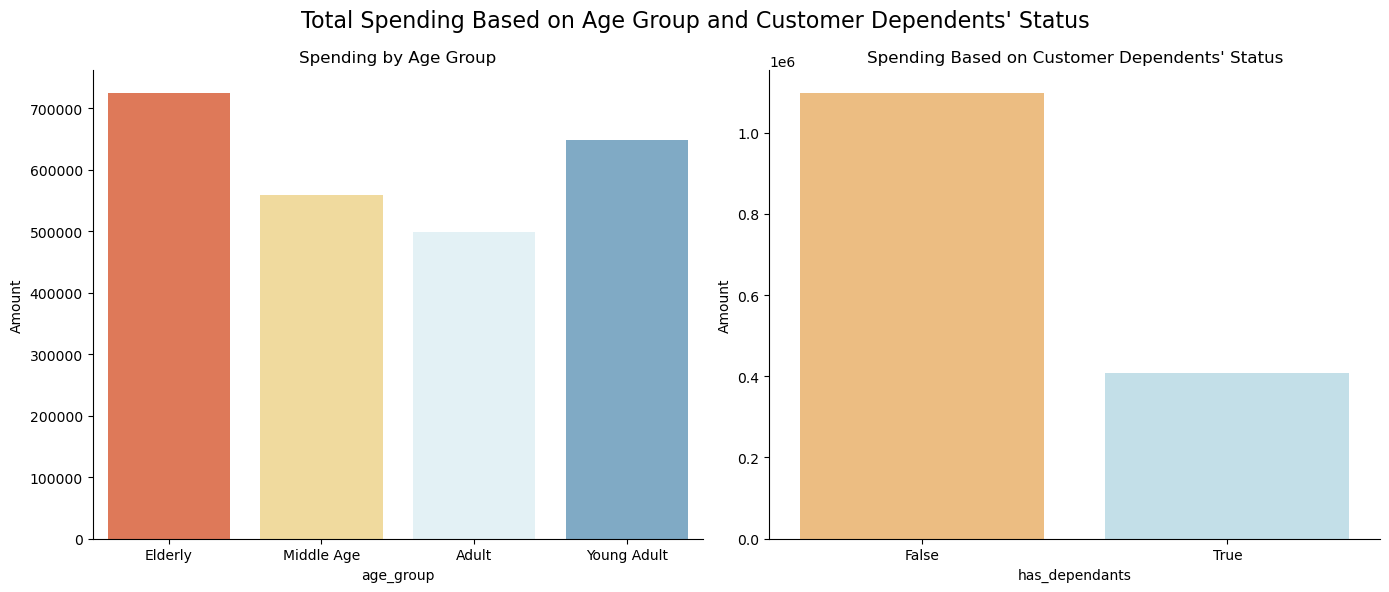

In [32]:
# Creating bar charts to see the distribution of customer's total spending based on age group and dependency status
fig, axes= plt.subplots(1, 2, figsize= (14, 6))

# Subplot 1: age_group
sns.barplot(data= eda_df, x= 'age_group', y= 'total_spending', ax= axes[0], ci= None, palette='RdYlBu')
axes[0].set_title('Spending by Age Group')
axes[0].set_ylabel('Amount')

# Subplot 2: has_dependants
sns.barplot(data= eda_df, x= 'has_dependants', y= 'total_spending', ax= axes[1], ci= None, palette='RdYlBu')
axes[1].set_title("Spending Based on Customer Dependents' Status")
axes[1].set_ylabel('Amount')

sns.despine()
fig.suptitle("Total Spending Based on Age Group and Customer Dependents' Status", fontsize=16)

plt.tight_layout()
plt.show()

The elderly group stands out as the category with the highest total spending, closely followed by young adults. This data indicates that these two age groups are the primary drivers of consumer spending. Conversely, the adult group falls behind, demonstrating the lowest total spending among the age categories. The reasons for this disparity could be multifaceted, potentially reflecting differences in financial responsibilities, such as mortgages, education costs, or other financial obligations, which may impact the spending capacity of this age group.

Based on the dependency status of customers, individuals without dependents tend to exhibit notably higher spending levels, surpassing their counterparts with dependents by more than 200%. This finding suggests that individuals without dependents allocate a larger portion of their financial resources towards their purchases when compared to those who have dependents to support. This divergence in spending behavior could be attributed to various factors, including the financial responsibilities associated with supporting dependents, such as children or elderly family members.

## Relationship Between Age and Conversion Rate

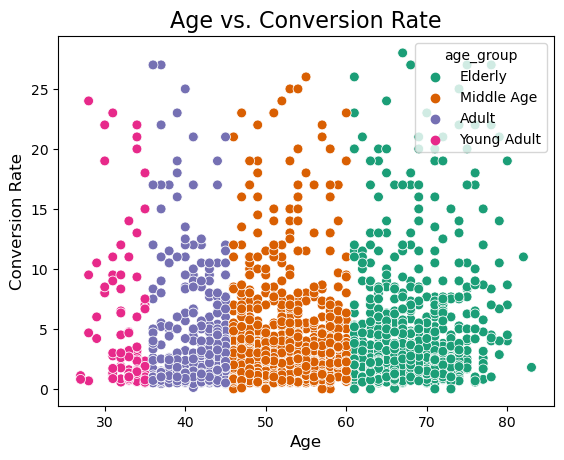

In [33]:
# Creating a scatterplot to see the relationship between age and conversion rate
sns.scatterplot(data= eda_df, x= 'age', y= 'conversion_rate', hue= 'age_group', s= 50, palette= 'Dark2')
plt.title('Age vs. Conversion Rate', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)

plt.show()

The graph shows that there is no apparent linear correlation between age and conversion rates. This means that as a customer's age increases or decreases, it does not necessarily result in a proportional change in the probability of conversion.

## Relationships Between Income and Conversion Rate

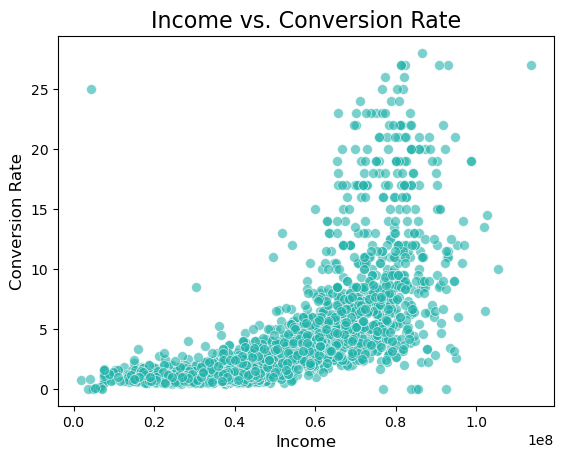

In [30]:
# Creating a scatterplot to see the relationship between income and conversion rate
sns.scatterplot(data=eda_df, x='Income', y='conversion_rate', s= 50, color='lightseagreen', alpha=0.6)
plt.title('Income vs. Conversion Rate', fontsize=16)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)

plt.show()

The observed graph depicting the relationship between income and conversion rate reveals a distinctive trend, which notably leans towards an exponential pattern. This suggests that the increments in income levels can lead to substantial changes in the conversion rate, indicating a potentially exponential growth pattern in conversion rate relative to income.

## Relationships Between Total Spending and Conversion Rate

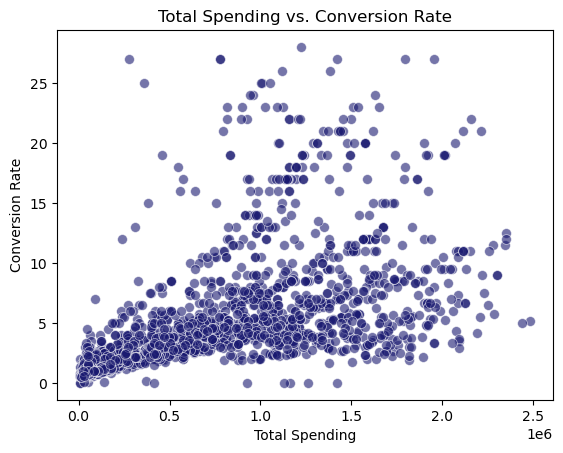

In [31]:
# Creating a scatterplot to see the relationship between total spending and conversion rate
sns.scatterplot(data= eda_df, x='total_spending', y='conversion_rate', s= 50, color='midnightblue', alpha=0.6)
plt.title('Total Spending vs. Conversion Rate')
plt.xlabel('Total Spending')
plt.ylabel('Conversion Rate')

plt.show()

Despite the wide dispersion in the data, a discernible pattern emerges, showing that as the total spending increases, there is a corresponding increase in the conversion rate. This positive correlation between total spending and conversion rate implies that customers who spend more tend to have a higher convertion rates.

## Relationships Between Income and Total Spending

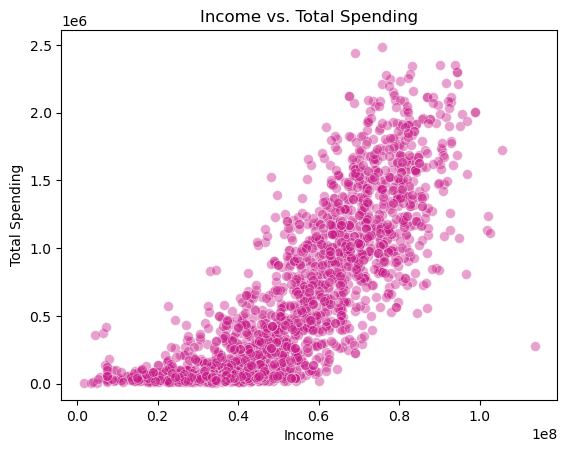

In [32]:
# Creating a scatterplot to see the relationship between income and total spending
sns.scatterplot(data=eda_df, x='Income', y='total_spending', s= 50, color='mediumvioletred', alpha=0.4)
plt.title('Income vs. Total Spending')
plt.xlabel('Income')
plt.ylabel('Total Spending')

plt.show()

Just like the association observed between income and conversion rate, there is a noticeable trend in the relationship between income and total spending, leans towards an exponential pattern. This suggests that as income levels rise there is an exponential increase in total spending. In essence, even small increments in income can result in significant changes in total spending.

## Campaign Participation

In [33]:
# Grouping and aggregating successful campaign rate by age group
campaign_rate_age= eda_df.groupby('age_group').agg({'ID': 'count', 'total_successful_campaign': 'sum'}).reset_index()
campaign_rate_age['avg_successful_campaign'] = campaign_rate_age['total_successful_campaign']/5

In [34]:
campaign_rate_age

,age_group,ID,total_successful_campaign,avg_successful_campaign
0,Adult,427,133,26.6
1,Elderly,686,228,45.6
2,Middle Age,972,251,50.2
3,Young Adult,116,43,8.6


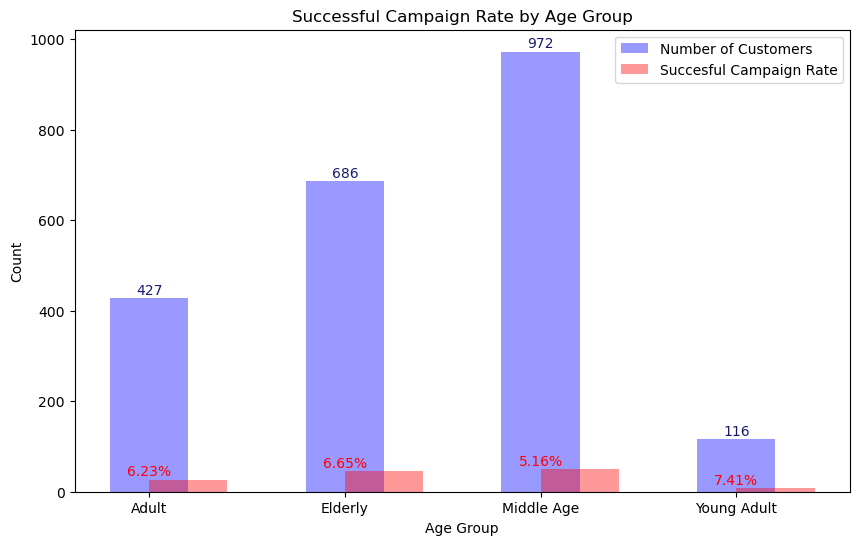

In [35]:
# Create a bar chart to display the proportion of the number of customers with successful campaign rates per age group

x = range(len(campaign_rate_age['age_group']))

plt.figure(figsize=(10, 6))

# Bar for number of customers (blue)
plt.bar(x, campaign_rate_age['ID'], width=0.4, label='Number of Customers', color='blue', align='center', alpha= 0.4)

for i, value in enumerate(campaign_rate_age['ID']):
    plt.text(i, value + 2, value, ha='center', va='bottom', color='midnightblue')
    
# Bar for successful campaign rates (red)
plt.bar(x, campaign_rate_age['avg_successful_campaign'], width=0.4, label='Succesful Campaign Rate', color='red', align='edge', alpha= 0.4)

for i, value in enumerate(campaign_rate_age['avg_successful_campaign']):
    percent = (value / campaign_rate_age['ID'][i]) * 100
    plt.text(i, value + 2, f'{percent:.2f}%', ha='center', va='bottom', color='red')

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Successful Campaign Rate by Age Group')
plt.xticks(x, campaign_rate_age['age_group'])
plt.legend()

plt.show()

The graph shows that the young adult group, despite having the smallest number of members, exhibits the highest success rate for campaigns. Conversely, the middle-aged group, which boasts the largest number of members, experiences the lowest success rate for campaigns. This suggests that targeting young adults, despite their smaller population, may yield more successful outcomes in campaigns compared to the larger but less responsive middle-aged group.

In [36]:
# Grouping and aggregating successful campaign rate by customers dependency status
campaign_rate_dependants= eda_df.groupby('has_dependants').agg({'ID': 'count', 'total_successful_campaign': 'sum'}).reset_index()
campaign_rate_dependants['avg_successful_campaign'] = campaign_rate_dependants['total_successful_campaign']/5
campaign_rate_dependants

,has_dependants,ID,total_successful_campaign,avg_successful_campaign
0,False,625,373,74.6
1,True,1576,282,56.4


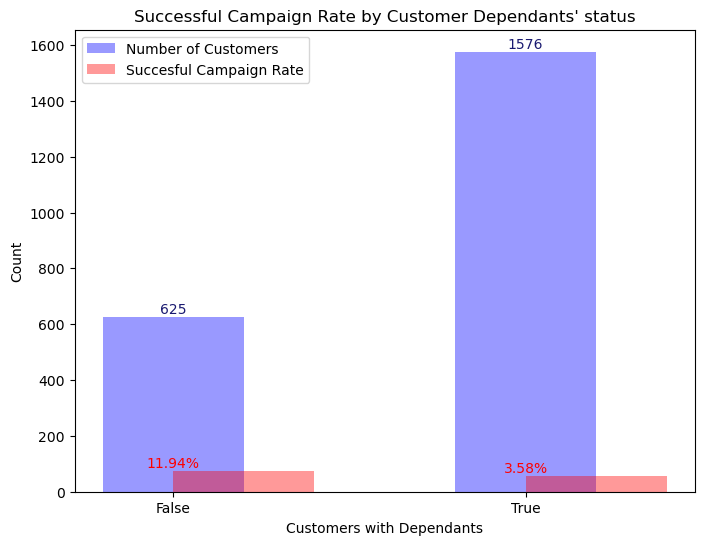

In [37]:
# Create a bar chart to display the proportion of the number of customers with successful campaign rates by customers dependency status
x= range(len(campaign_rate_dependants['has_dependants']))

plt.figure(figsize=(8, 6))

# Bar for number of customers (blue)
plt.bar(x, campaign_rate_dependants['ID'], width= 0.4, label= 'Number of Customers', color= 'blue', align= 'center', alpha= 0.4)

for i, value in enumerate(campaign_rate_dependants['ID']):
    plt.text(i, value + 2, value, ha='center', va='bottom', color='midnightblue')

# Bar for successful campaign rates (red)
plt.bar(x, campaign_rate_dependants['avg_successful_campaign'], width=0.4, label='Succesful Campaign Rate', color='red', align='edge', alpha= 0.4)

for i, value in enumerate(campaign_rate_dependants['avg_successful_campaign']):
    percent = (value/campaign_rate_dependants['ID'][i]) * 100
    plt.text(i, value + 2, f'{percent:.2f}%', ha='center', va='bottom', color='red')
    
plt.xlabel('Customers with Dependants')
plt.ylabel('Count')
plt.title("Successful Campaign Rate by Customer Dependants' status")
plt.xticks(x, campaign_rate_dependants['has_dependants'])
plt.legend()

plt.show()

Customers without dependents have campaign success rate that is more than three times higher than that of customers with dependents. This stark contrast underscores the importance of tailoring marketing strategies to different customer segments, recognizing that those without dependents may be more responsive to campaigns compared to their counterparts with dependents.